In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
# from sklearn.tree import DecisionTreeClassifier

# import numpy as np

In [8]:
df1 = pd.read_csv('/home/thisubuntu/statskewWeek8/Campaign_data_statistics_section_1 (1).csv')

In [9]:
df1.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [10]:
print(df1.shape)
df1.columns

(1888, 22)


Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_timer', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience',
       'click_rate'],
      dtype='object')

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

In [12]:
df1.describe()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,...,1888.000000,1888.000000,1888.000000,1888.0,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,944.500000,4.395657,86.246292,14185.780191,35.239407,2.828390,0.199682,9.949682,17.525424,4.222458,...,0.909958,0.056674,0.834216,0.0,0.210805,0.039725,40.197034,0.112288,11.634534,0.041888
std,545.162973,3.277927,30.143206,7327.615307,28.139498,1.763193,0.399867,5.300719,12.369526,4.628348,...,0.866467,0.231279,1.033901,0.0,0.613442,0.195363,553.957470,0.315804,2.949121,0.084223
min,1.000000,0.000000,9.000000,23.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,472.750000,3.000000,69.000000,9554.500000,21.000000,1.000000,0.000000,6.000000,9.000000,2.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.005413
50%,944.500000,3.000000,83.000000,12689.000000,29.000000,3.000000,0.000000,10.000000,12.000000,3.000000,...,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.010686
75%,1416.250000,3.000000,98.000000,17351.500000,40.000000,4.000000,0.000000,15.000000,27.250000,5.000000,...,2.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.035589
max,1888.000000,15.000000,265.000000,44491.000000,286.000000,6.000000,1.000000,15.000000,43.000000,49.000000,...,6.000000,1.000000,6.000000,0.0,6.000000,1.000000,14999.000000,1.000000,16.000000,0.897959


In [13]:
one_hot_encoded = pd.get_dummies(df1['times_of_day'])
df2 = pd.concat([df1.drop(columns='times_of_day', axis=1), one_hot_encoded], axis=1)
print(df2)
df2.head()


      campaign_id  sender  subject_len  body_len  mean_paragraph_len  \
0               1       3           76     10439                  39   
1               2       3           54      2570                 256   
2               3       3           59     12801                  16   
3               4       3           74     11037                  30   
4               5       3           80     10011                  27   
...           ...     ...          ...       ...                 ...   
1883         1884       3           88      1451                  75   
1884         1885       3           58     10537                  40   
1885         1886       3           89     11050                  26   
1886         1887       3           58     10537                  40   
1887         1888       3           89     11050                  26   

      day_of_week  is_weekend  category  product  no_of_CTA  ...  is_timer  \
0               5           1         6       26         

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,...,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate,Evening,Morning,Noon
0,1,3,76,10439,39,5,1,6,26,3,...,0,0,0,0,0,14,0.103079,False,False,True
1,2,3,54,2570,256,5,1,2,11,0,...,0,0,0,0,0,10,0.700000,False,True,False
2,3,3,59,12801,16,5,1,2,11,3,...,0,0,0,0,0,16,0.002769,False,False,True
3,4,3,74,11037,30,4,0,15,9,4,...,0,0,0,0,0,10,0.010868,True,False,False
4,5,3,80,10011,27,5,1,6,26,3,...,0,0,0,0,0,14,0.142826,False,False,True


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

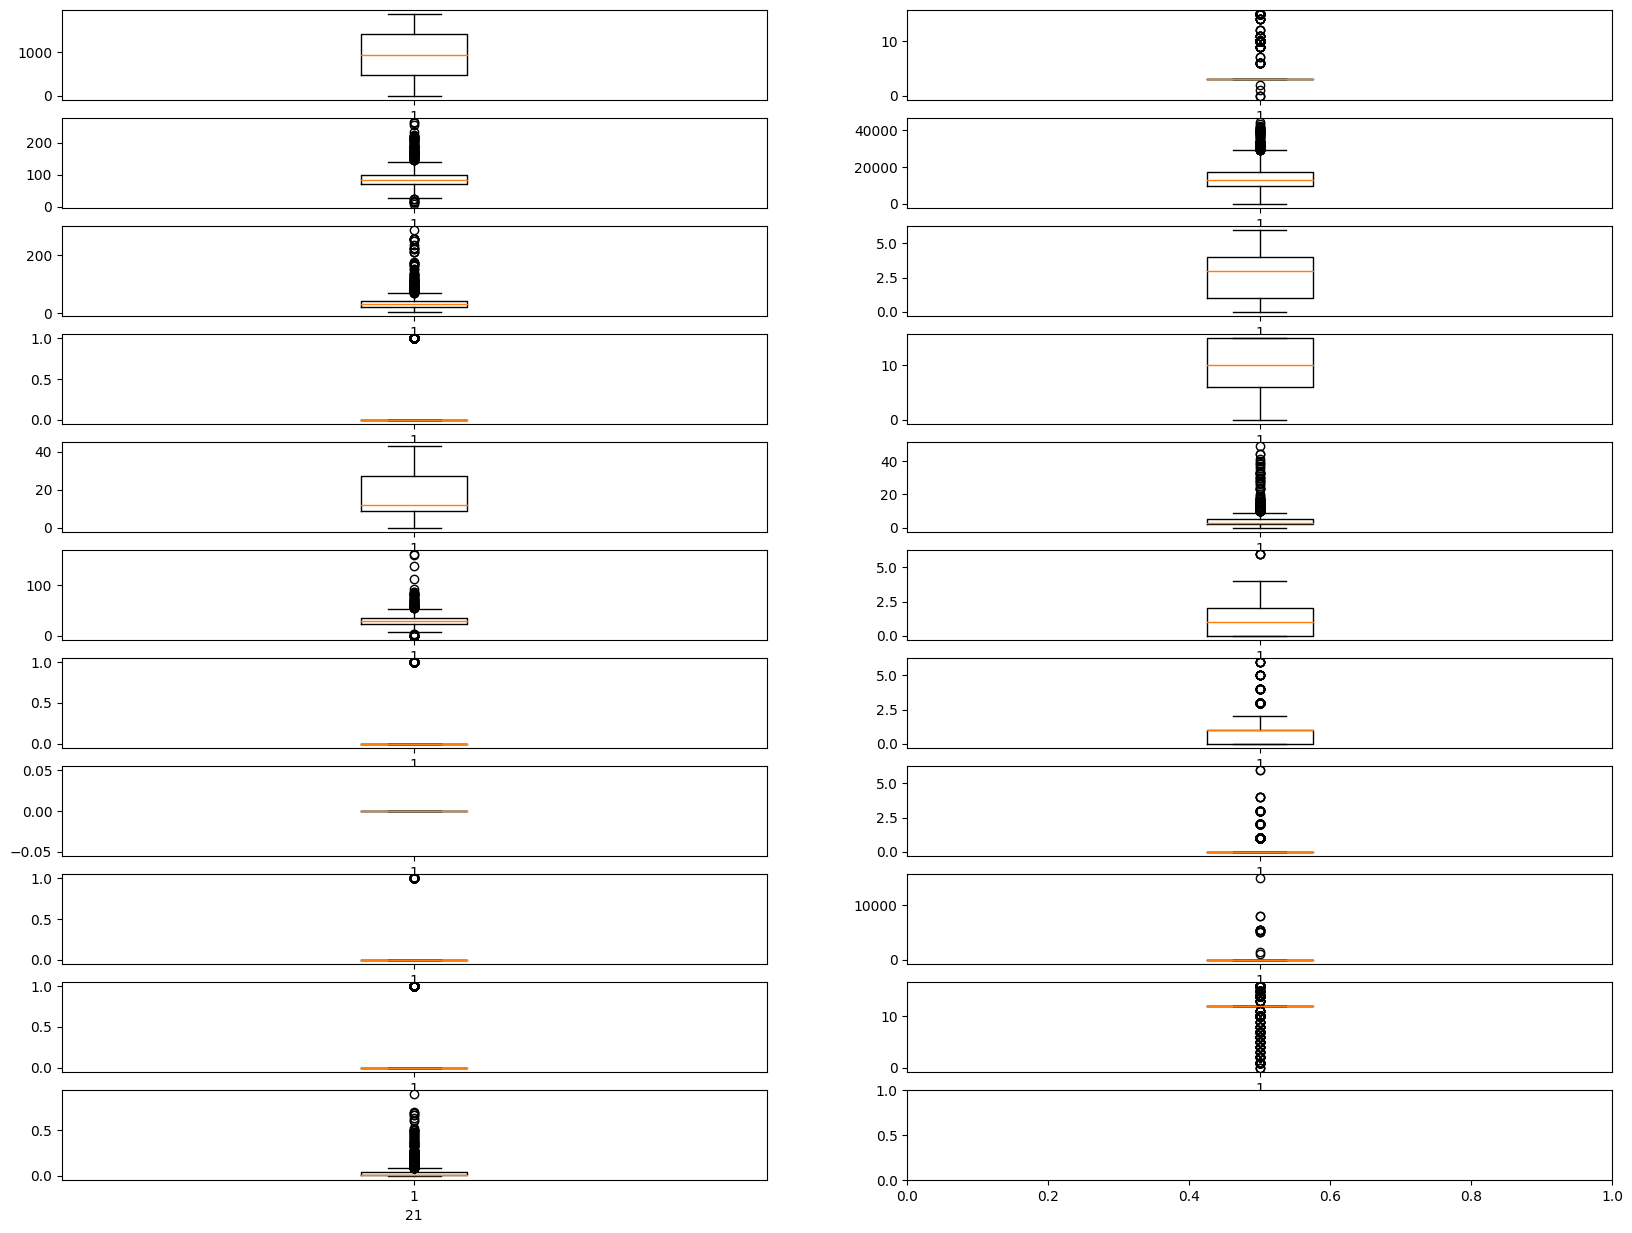

In [14]:
plt.figure(figsize=(20,18))
i = 1
for col in df2:
  plt.subplot(13,2,i)
  plt.boxplot(df2[col])
  plt.xlabel(i)
  i+=1
plt.show()




In [15]:
data = df2.drop(columns='campaign_id',axis=1)

X = data.drop(columns='click_rate',axis=1)
y = data['click_rate']

In [16]:
feature_select = SelectFromModel(RandomForestRegressor()).fit(X,y)
feature_select.get_feature_names_out()

array(['subject_len', 'body_len', 'mean_paragraph_len', 'category',
       'no_of_CTA', 'mean_CTA_len'], dtype=object)

In [17]:
data.corr()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,...,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate,Evening,Morning,Noon
sender,1.000000,-0.102559,0.197929,0.056891,-0.046928,-0.059499,0.188444,0.070689,0.100454,0.016604,...,NaN,-0.105279,-0.046900,0.024099,-0.071096,-0.132554,-0.031398,-0.033458,0.029973,0.018684
subject_len,-0.102559,1.000000,0.427326,-0.224770,-0.033574,-0.056666,0.012601,-0.007108,0.400213,0.144261,...,NaN,0.080303,0.125134,0.033410,0.100584,-0.021855,-0.180143,-0.006137,-0.071913,0.048537
body_len,0.197929,0.427326,1.000000,-0.496146,-0.089146,-0.079255,0.026781,-0.027747,0.559353,0.083468,...,NaN,-0.043931,0.051123,0.022431,0.023734,-0.075754,-0.247866,-0.098519,-0.025787,0.121477
mean_paragraph_len,0.056891,-0.224770,-0.496146,1.000000,0.003221,-0.012964,0.037475,-0.054066,-0.170012,0.064632,...,NaN,-0.043173,-0.032096,0.006765,-0.037435,-0.110896,0.178042,0.009744,0.087961,-0.061786
day_of_week,-0.046928,-0.033574,-0.089146,0.003221,1.000000,0.720599,-0.058760,0.000249,-0.037789,-0.003614,...,NaN,-0.013571,-0.037122,-0.013822,0.012735,0.081693,0.086372,-0.194942,0.160453,0.117133
is_weekend,-0.059499,-0.056666,-0.079255,-0.012964,0.720599,1.000000,-0.063763,-0.015759,-0.033464,-0.032421,...,NaN,-0.007504,-0.033757,-0.036255,-0.009789,0.046638,0.114138,-0.245139,0.225921,0.133220
category,0.188444,0.012601,0.026781,0.037475,-0.058760,-0.063763,1.000000,0.007144,-0.023931,0.127554,...,NaN,0.100071,0.166200,0.068450,0.189839,-0.026602,-0.167756,0.180018,-0.003131,-0.192685
product,0.070689,-0.007108,-0.027747,-0.054066,0.000249,-0.015759,0.007144,1.000000,0.027486,0.043223,...,NaN,0.013122,-0.018291,-0.060512,-0.110753,0.058073,0.121602,-0.053524,-0.008672,0.062886
no_of_CTA,0.100454,0.400213,0.559353,-0.170012,-0.037789,-0.033464,-0.023931,0.027486,1.000000,0.170387,...,NaN,-0.037244,0.041797,-0.015229,-0.015649,-0.007979,-0.172637,-0.071520,0.002502,0.075819
mean_CTA_len,0.016604,0.144261,0.083468,0.064632,-0.003614,-0.032421,0.127554,0.043223,0.170387,1.000000,...,NaN,0.032827,0.029194,0.013934,0.100071,0.007170,-0.031162,0.006821,-0.021281,0.005031


In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0)

In [19]:
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (1510, 22), X_test: (378, 22), y_train: (1510,), y_test: (378,)


In [20]:
ssc = StandardScaler()
ssc.fit(X_train)
X_train_ssc = ssc.transform(X_train)
X_test_ssc = ssc.transform(X_test)

In [21]:
model = RandomForestRegressor()
model.fit(X_train_ssc,y_train)
y_pred = model.predict(X_test_ssc)

In [22]:
y_pred

array([0.01007958, 0.07190781, 0.0380149 , 0.01866034, 0.01301621,
       0.03176287, 0.00934048, 0.01268406, 0.17594239, 0.03786499,
       0.01388689, 0.03406559, 0.04320815, 0.01630627, 0.08998599,
       0.00962808, 0.01134878, 0.04938169, 0.02378265, 0.09272968,
       0.02011883, 0.02154025, 0.01771685, 0.01383038, 0.05943573,
       0.01076119, 0.02086316, 0.01879816, 0.01627186, 0.15844928,
       0.01821735, 0.18380677, 0.0273633 , 0.11435195, 0.04302913,
       0.01417891, 0.01157458, 0.17702793, 0.01761928, 0.0039839 ,
       0.05194254, 0.04124733, 0.02591894, 0.0559198 , 0.01551797,
       0.03001006, 0.00522061, 0.14719453, 0.02063713, 0.03985861,
       0.05039606, 0.14370716, 0.02455372, 0.10246885, 0.07188674,
       0.07165896, 0.0715779 , 0.0176507 , 0.01300919, 0.01157075,
       0.00927538, 0.01405835, 0.0673863 , 0.01810797, 0.08723822,
       0.01551916, 0.01024253, 0.07549421, 0.06359625, 0.00710641,
       0.0354981 , 0.00537555, 0.01249851, 0.0413919 , 0.01309

In [23]:
mse = mean_squared_error(y_test, model.predict(X_test_ssc))

In [24]:
print(f"MSE: {mse}")

MSE: 0.004423868590926181


In [25]:
model.score(X_train_ssc,y_train)

0.9344632841723204

In [26]:
model.score(X_test_ssc,y_test)

0.43189037727460144

In [27]:
param = {
    "n_estimators":[50,60,80,100],
    "max_depth": [10,14,18,20]
}


In [28]:
clf = GridSearchCV(model,param)
clf.fit(X_train_ssc,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 14, 18, 20],
                         'n_estimators': [50, 60, 80, 100]})

In [29]:
clf.best_params_

{'max_depth': 14, 'n_estimators': 60}

In [30]:
model = RandomForestRegressor(n_estimators=80,max_depth=18)
model.fit(X_train_ssc,y_train)
#y_pred = model.predict(X_test_ssc)

RandomForestRegressor(max_depth=18, n_estimators=80)

In [31]:
model.predict(X_test_ssc)

array([0.01150349, 0.05469596, 0.03979998, 0.01885732, 0.01274685,
       0.03686486, 0.0070263 , 0.0130446 , 0.17873912, 0.05498124,
       0.01133917, 0.02708582, 0.05913121, 0.01581359, 0.07273407,
       0.00804242, 0.01288913, 0.0575753 , 0.02174461, 0.10751235,
       0.01010654, 0.01992445, 0.01656824, 0.01443958, 0.07603817,
       0.01154199, 0.01710543, 0.01185247, 0.01467829, 0.19161625,
       0.01698754, 0.20415791, 0.03104966, 0.13101023, 0.04178424,
       0.01170451, 0.00733997, 0.17381364, 0.01433046, 0.00370522,
       0.10747495, 0.04907714, 0.02127553, 0.04489881, 0.01450433,
       0.0208648 , 0.01092254, 0.16102404, 0.01490485, 0.03471045,
       0.06084808, 0.14880479, 0.0236726 , 0.07980327, 0.05924754,
       0.0780479 , 0.04483626, 0.01889549, 0.01251395, 0.01145402,
       0.00869697, 0.01488648, 0.07740023, 0.013084  , 0.10050995,
       0.01176145, 0.01189332, 0.09894953, 0.0722709 , 0.00746486,
       0.03199316, 0.00373487, 0.01038334, 0.05377436, 0.01945

In [32]:
mse = mean_squared_error(y_test, model.predict(X_test_ssc))

In [33]:
print(f"MSE: {mse}")

MSE: 0.004197035967499594


In [34]:
import pickle

In [35]:
filename = 'finalized_model.pickle'
pickle.dump(model, open(filename,'wb'))
